<a href="https://colab.research.google.com/github/Karthikard/DL/blob/main/3_batch_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving homeprices_banglore.csv to homeprices_banglore.csv


In [3]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [6]:
df.describe()

,area,bedrooms,price
count,20.000000,20.000000,20.000000
mean,1821.450000,2.900000,78.853500
std,864.615794,0.967906,43.761901
min,800.000000,1.000000,32.000000
25%,1173.750000,2.000000,41.500000
50%,1480.500000,3.000000,61.000000
75%,2633.000000,3.250000,106.500000
max,3700.000000,5.000000,167.000000


In [7]:
df.notnull().sum()

,0
area,20
bedrooms,20
price,20


In [8]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [12]:
scaled_y = sy.fit_transform(df['price'].values.reshape(-1,1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [14]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=number_of_features) #weight =1
  b = 0                                 #bias =0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w,scaled_x.T)+b  #w1*area+w2*bedrooms+b

    w_grad = (2/total_samples) * np.dot(scaled_x.T, (y_true - y_predicted))
    b_grad = 2/total_samples * np.sum(y_true - y_predicted)

    w=w-learning_rate*w_grad
    b=b-learning_rate*b_grad

    cost = np.mean(np.square(y_true - y_predicted))

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w,b,cost_list,epoch_list

w,b,cost_list,epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
print(w,b,cost_list[-1])

[122986.01412726 158113.03116429] 308077.6618718534 108264591121.56067


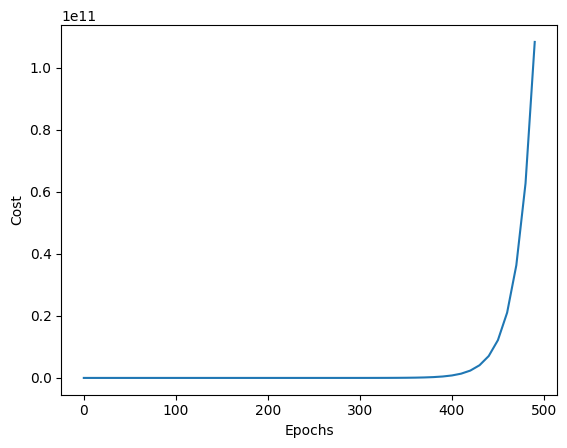

In [15]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(epoch_list,cost_list)